In [1]:
import fixed_income_derivatives_E2024 as fid
import matplotlib.pyplot as plt
import numpy as np
import copy

In [2]:
EURIBOR_fixing = [{"id": 0,"instrument": "libor","maturity": 1/2, "rate":0.02750}]
fra_market = [{"id": 1,"instrument": "fra","exercise": 1/12,"maturity": 7/12,
"rate": 0.02980},
{"id": 2,"instrument": "fra","exercise": 2/12,"maturity": 8/12, "rate": 0.03122},
{"id": 3,"instrument": "fra","exercise": 3/12,"maturity": 9/12, "rate": 0.03257},
{"id": 4,"instrument": "fra","exercise": 4/12,"maturity": 10/12, "rate": 0.03384},
{"id": 5,"instrument": "fra","exercise": 5/12,"maturity": 11/12, "rate": 0.03504},
{"id": 6,"instrument": "fra","exercise": 6/12,"maturity": 12/12, "rate": 0.03617},
{"id": 7,"instrument": "fra","exercise": 7/12,"maturity": 13/12, "rate": 0.03724},
{"id": 8,"instrument": "fra","exercise": 8/12,"maturity": 14/12, "rate": 0.03825},
{"id": 9,"instrument": "fra","exercise": 9/12,"maturity": 15/12, "rate": 0.03920}]
swap_market = [{"id": 10,"instrument": "swap","maturity": 2, "rate": 0.03782,
"float_freq": "semiannual", "fixed_freq": "annual","indices": []},
{"id": 11,"instrument": "swap","maturity": 3, "rate": 0.04152, "float_freq":
"semiannual", "fixed_freq": "annual","indices": []},
{"id": 12,"instrument": "swap","maturity": 4, "rate": 0.04402, "float_freq":
"semiannual", "fixed_freq": "annual","indices": []},
{"id": 13,"instrument": "swap","maturity": 5, "rate": 0.04577, "float_freq":
"semiannual", "fixed_freq": "annual","indices": []},
{"id": 14,"instrument": "swap","maturity": 7, "rate": 0.04797, "float_freq":
"semiannual", "fixed_freq": "annual","indices": []},
{"id": 15,"instrument": "swap","maturity": 10, "rate": 0.04971, "float_freq":
"semiannual", "fixed_freq": "annual","indices": []},
{"id": 16,"instrument": "swap","maturity": 15, "rate": 0.05105, "float_freq":
"semiannual", "fixed_freq": "annual","indices": []},
{"id": 17,"instrument": "swap","maturity": 20, "rate": 0.05170, "float_freq":
"semiannual", "fixed_freq": "annual","indices": []},
{"id": 18,"instrument": "swap","maturity": 30, "rate": 0.05230, "float_freq":
"semiannual", "fixed_freq": "annual","indices": []}]
data = EURIBOR_fixing + fra_market + swap_market

In [22]:
interpolation_options = {"method":"hermite","degree":2,"transition": "smooth"}
T_fit, R_fit = fid.zcb_curve_fit(data,interpolation_options = interpolation_options)
T_6m = np.array([i*0.5 for i in range(0,61)])
p_inter, R_inter, f_inter, T_inter = fid.zcb_curve_interpolate(T_6m,T_fit,R_fit,interpolation_options = interpolation_options)


In [ ]:
# b)
# Cashflows matrix for the bond
T = np.arange(0.5, 10.5, 0.5)
C = np.zeros(len(T))
# 
C[:19] = 2.5
C[19]= 102.5
pi_2_b = C @ p_inter[1:21]
print(f"Price {pi_2_b}")
# Fid functions
ytm_fr = fid.ytm(pi_2_b, T, C)
mac_dur = fid.macauley_duration(pi_2_b, T,C, ytm_fr)
mod_dur = fid.modified_duration(pi_2_b, T,C,ytm_fr)
convex = fid.convexity(pi_2_b, T,C, ytm_fr)
print(f"Yield-to-maturity: {ytm_fr}")
print(f"Macauley Durattion: {mac_dur}")
print(f"Modified Durattion: {mod_dur}")
print(f"Convexity: {convex}")
      


Price 100.71704212519342
Yield-to-maturity: 0.04968635467120988
Macauley Durattion: 7.997950060808084
Modified Durattion: 7.619371277159507
Convexity: 73.46537254317197


In [28]:
# c) 
delta_ytm = 0.001 # Change in YTM (10 bps)               

# Percentage price change using duration only
price_change_duration = -mod_dur * delta_ytm

# Percentage price change using duration and convexity
price_change_duration_convexity = -mod_dur * delta_ytm + 0.5 * convex * (delta_ytm ** 2)

# Print 
print(f"Percentage Price Change (Duration): {price_change_duration:.10f}")
print(f"Percentage Price Change (Duration and Convexity): {price_change_duration_convexity:.10f}")


Percentage Price Change (Duration): -0.0076193713
Percentage Price Change (Duration and Convexity): -0.0075826386


In [35]:
# d) Finding the accrual factor and par swap rate of the 3Y payer swap
T3 = [0.5 * i for i in range(1,7)]
p3 = p_inter[1:7]

T3 = [0.5 * i for i in range(1,10)]
p3 = p_inter[1:10]
Y3_acc = fid.accrual_factor_from_zcb_prices(0,0,3,"semiannual",T3,p3)
print(f"3Year payer swap accrual factor: {Y3_acc}")


3Year payer swap accrual factor: 2.8119187085920623


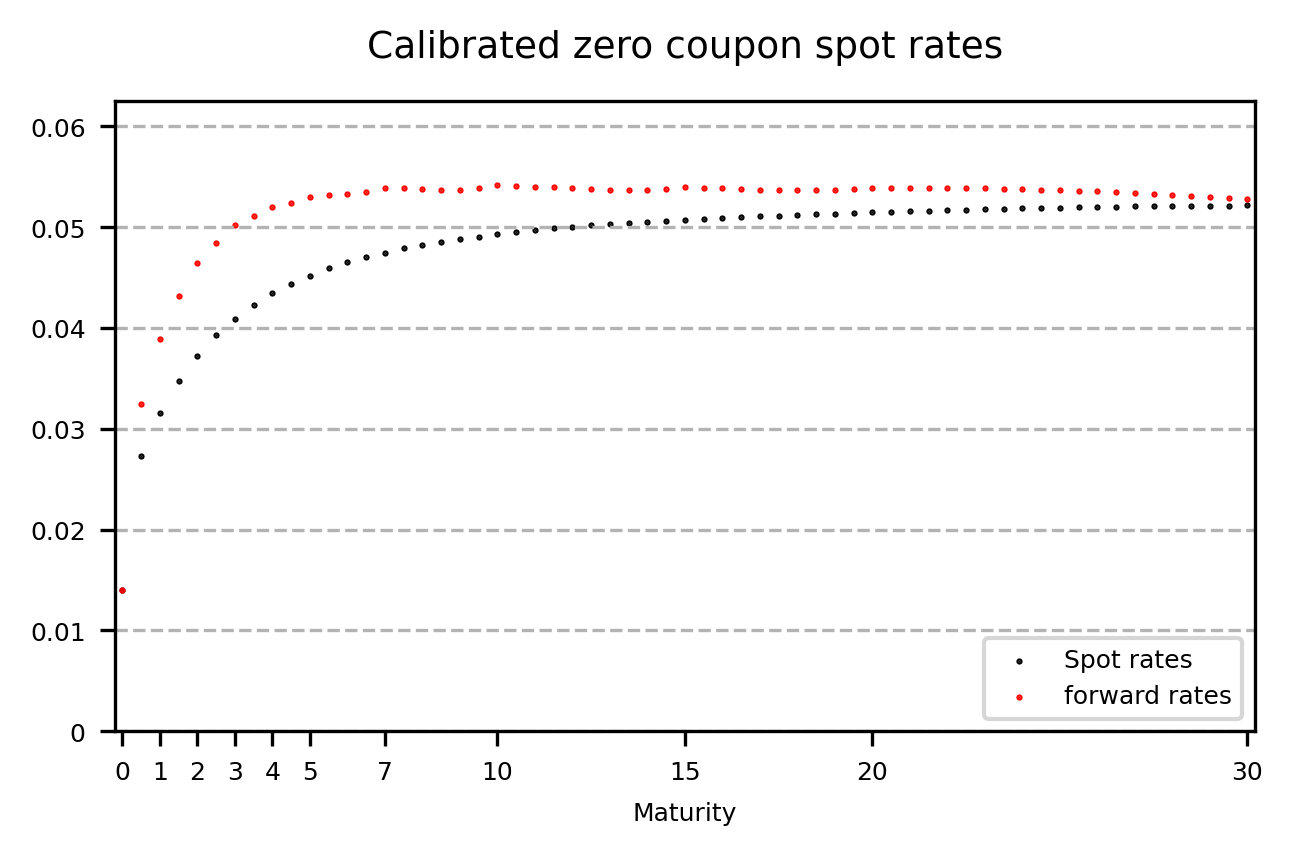

In [11]:
fig = plt.figure(constrained_layout=False, dpi = 300, figsize = (5,3))
fig.suptitle(f"Calibrated zero coupon spot rates", fontsize = 9)
fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,
hspace=0)
gs = fig.add_gridspec(nrows=1,ncols=1,left=0.12,bottom=0.2,right=0.88,top=0.90,wspace=0,
hspace=0)
ax = fig.add_subplot(gs[0,0])
xticks = [0,1,2,3,4,5,7,10,15,20,30]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks,fontsize = 6)
ax.set_xlim([xticks[0]+-0.2,xticks[-1]+0.2])
plt.xlabel(f"Maturity",fontsize = 6)
ax.set_yticks([0,0.01,0.02,0.03,0.04,0.05,0.06])
ax.set_yticklabels([0,0.01,0.02,0.03,0.04,0.05,0.06],fontsize = 6)
ax.set_ylim([0,0.0625])
plt.grid(axis = 'y', which='major', color=(0.7,0.7,0.7,0), linestyle='--')
p1 = ax.scatter(T_inter, R_inter, s = 1, color = 'black', marker = ".",label="Spot rates")
p2 = ax.scatter(T_inter, f_inter, s = 1, color = 'red', marker = ".",label="forward rates")
# p3 = ax.scatter(T_swap, R_swap, s = 1, color = 'green', marker = ".",label="par swap rates")
plots = [p1,p2]
labels = [item.get_label() for item in plots]
ax.legend(plots,labels,loc="lower right",fontsize = 6)
plt.show()
